<img src="https://pbs.twimg.com/profile_images/378800000821059424/a3ea6fbe81395f9bccb79026fdbd18f5_400x400.png " alt="Fulford Maths" style="width: 120px; float: right"/>
# Running class level analysis

* Select the desired class.
* Select "Cell", "Run All" from the menu bar to begin default analysis

# Select a class here...

Currently this is set up for Higher Classes only: to view data for Foundation sets, change the *selected_classes* parameter above.

In [1]:
selected_class = '11-IM'

print("Displaying analysis for {}".format(selected_class))

Displaying analysis for 11-IM


In [2]:
# This snippet will hide/show all of the  code cells to make this easier to read!
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code cell visibility"></form>''')

In [18]:
# Importing required modules and functions
from ClMATE_analysis_functions import *

%pylab inline

# Core imports
from collections import namedtuple
import pandas as pd
import numpy as np
import sqlite3
import pdfkit
import os

# Plotting
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('notebook', font_scale=1.5)

#Dynamic JavaScript based Plotting is possible through Lightning:
#from lightning import Lightning
#lgn = Lightning(ipython=True, host='http://public.lightning-viz.org') #local=True) #

# Stop warnings from being displayed inline
import warnings
warnings.filterwarnings('ignore')

# Show available plot rendering styles
print("The following plot styles are available:\n{}".format(", ".join(plt.style.available)))
# See output at the bottom of this cell for alternative plot styles and change this here if desired.
#plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib
The following plot styles are available:
seaborn-notebook, ggplot, seaborn-bright, bmh, seaborn-ticks, seaborn-pastel, fivethirtyeight, seaborn-white, seaborn-poster, seaborn-colorblind, classic, seaborn-dark-palette, seaborn-dark, seaborn-whitegrid, seaborn-darkgrid, seaborn-muted, seaborn-deep, grayscale, dark_background, seaborn-paper, seaborn-talk


In [4]:
# Generate the MASTER dataframe that will be sliced and regrouped from now on
foundation_sets = ['11-CCL', '11-MD']
higher_sets = ['11-PG', '11-DBY', '11-HH', '11-AR', '11-AK', '11-IM']

selected_classes = higher_sets
_masterDF = get_master_dataframe(selected_classes)

# The following pupils did NOT sit the test and need to be removed from the analysis
non_sitters = ['Gurney, Connor Andrew', 'Nicholson, Kate Louise Rachel', 'Beal, Rachel Ellie', 'Li, Ricky Rui-Qi']
masterDF = _masterDF[[x not in non_sitters for x in _masterDF['Name']]]
masterDF.replace(to_replace='n/a', value='C', inplace=True)
masterDF.replace(to_replace='None', value='C', inplace=True)


Data fetched for the following assessments
	56: Year 11 December Non-Calculator Mock 2015
	57: Year 11 December Calculator Mock 2015


### NOTE:
* *masterDF* should be used when comparing to the cohort.
* *class_DF* is provided as a conveniance for when you are only looking at the selected class to avoid having to slice out the selected class every time.


##### Overall grade boundaries for the assessments were as follows:

| Grade (Higher) | Percentage Mark || Grade (Foundation) | Percentage Mark |
|:-----------:   |:---------------:||:-----------------: |:---------------:|
| A\*            | 77.5%           || C                  | 69.5%           |
| A              | 62.5%           || D                  | 59.5%           |
| B              | 47.5%           || E                  | 50%             |
| C              | 32.5%           || F                  | 40.5%           |
| D              | 18%             || G                  | 31%             |
| E              | 10%             |

In [5]:
class_DF = masterDF[masterDF.tSet==selected_class]
# Correcting a stupid error made in the assessment creation!
class_DF = class_DF[class_DF['topic']!='DELETE ME    I AM AN EXTRA QUESTION']

# Best topics over both papers

In [6]:
#Best performing topics
(np.round(class_DF.groupby(by='topic')
         .mean()
         .sort_values(by='Qperformance%', ascending=False), 2)
         .replace(to_replace=56, value='Non-Calc')
         .replace(to_replace=57, value='Calc')[:10])

,aID,qNum,mark,total,Qperformance%
topic,,,,,
Scatter Diagrams and line of best fit,Non-Calc,6,2.93,3,97.52
Probability and two way tables,Calc,1,4.67,5,93.33
Drawing enlargements,Calc,4,1.56,2,77.78
Value for money calculations (QWC),Calc,6,3.04,4,75.93
Using LCM to solve problems,Non-Calc,9,2.15,3,71.59
Using a calculator,Calc,3,2.00,3,66.74
Dividing in a ratio,Calc,8,1.93,3,64.22
Expand and simplify,Calc,7,2.56,4,63.89
Comparative costs problem (QWC),Non-Calc,4,3.11,5,62.22


# Worst topics over both papers

In [7]:
(np.round(class_DF.groupby(by='topic')
         .mean()
         .sort_values(by='Qperformance%', ascending=True), 2)
         .replace(to_replace=56, value='Non-Calc')
         .replace(to_replace=57, value='Calc')[0:10])

,aID,qNum,mark,total,Qperformance%
topic,,,,,
Algebraic proof for recurring decimals,Non-Calc,21,0.00,3,0.00
Surds and indices,Non-Calc,22,0.00,4,0.00
Area of a pareallelogram and triginometry,Calc,23,0.00,3,0.00
Volume and rates of change,Non-Calc,23,0.00,5,0.00
Finding the equations of a perpendicular line,Calc,17,0.00,3,0.00
Coordinates on a straight line,Calc,12,0.00,3,0.00
Algebraic proof and solving a quadratic,Non-Calc,19,0.04,6,0.63
Changing the subject of a formula,Non-Calc,20,0.04,4,0.93
Algebraic proof,Calc,20,0.04,3,1.22


# Performance vs FFT by FFT

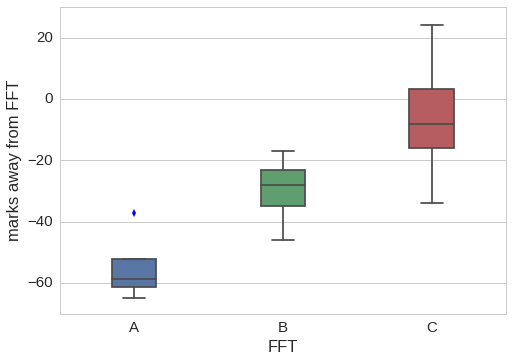

In [36]:
# Finding distance from lower grade boundary per pupil
# Higher
boundaries = {"A*": 77.5, "A": 62.5, "B": 47.5, "C": 32.5, "D": 18.0, "E": 10.0}
# Foundation
# boundaries = {"C": 69.5, "D": 59.5, "E": 50.0, "F": 40.5, "G": 31.0}

def find_dev(target, result):
    try:
        return (result - boundaries[target])
    except KeyError:
        return 0

distDF = class_DF.groupby(['FFT', 'Name']).sum()
distDF['Overall%'] = np.round(distDF['mark'] / 2, 2)
distDF = distDF[['Overall%']]
distDF.reset_index(inplace=True)
distDF['marks away from FFT'] = np.vectorize(find_dev)(distDF['FFT'], distDF['Overall%']) * 2

sns.boxplot(x='FFT', y='marks away from FFT', data=distDF, width=0.3)

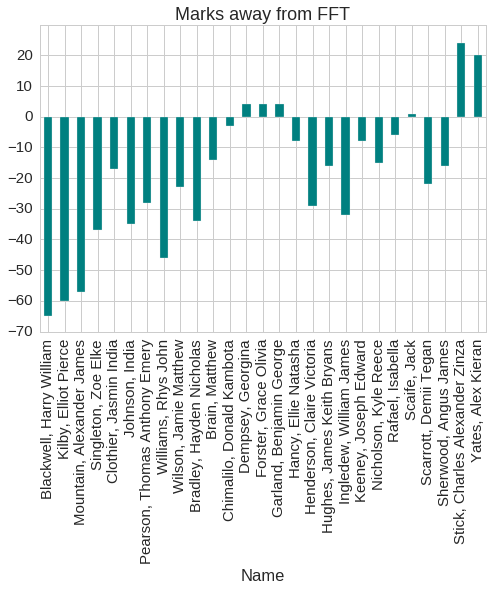

In [9]:
distDF.sort().plot(kind='bar',
            x='Name',
            y='marks away from FFT',
            color='#008080',
            title='Marks away from FFT',
            legend=False,
            yticks=[x for x in range(-70, 30, 10)])

# Class performance by module

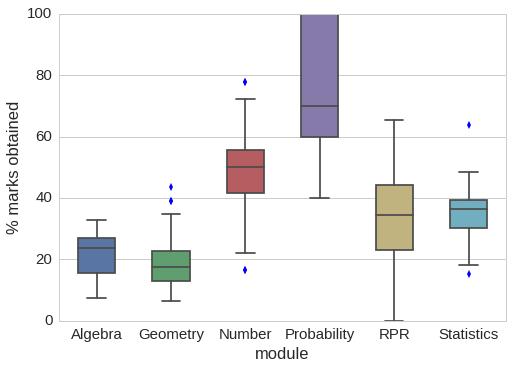

In [10]:
by_moduleDF = class_DF.groupby(by=['FFT', 'Name', 'module']).sum()[['mark', 'total']]
by_moduleDF['% marks obtained'] = np.round(by_moduleDF['mark'] / by_moduleDF['total'] * 100, 2)
by_moduleDF.reset_index(inplace=True)
sns.boxplot(x='module', y='% marks obtained', data=by_moduleDF, width=0.5)

# Distribution of marks for our class vs the cohort

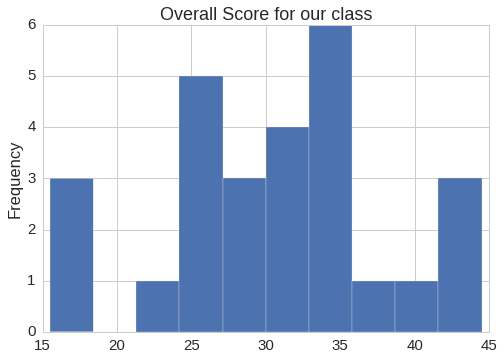

In [11]:
distDF['Overall%'].plot(kind='hist', title="Overall Score for our class")

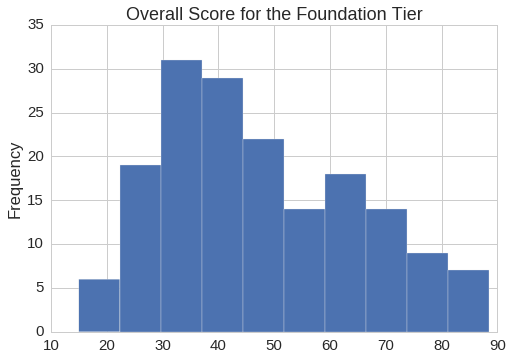

In [12]:
dist2DF = masterDF.groupby(['tSet', 'FFT', 'Name']).sum()
dist2DF['Overall%'] = np.round(dist2DF['mark'] / 2, 2)
dist2DF['Overall%'].plot(kind='hist', title="Overall Score for the Foundation Tier")

# Stacked histogram of the above

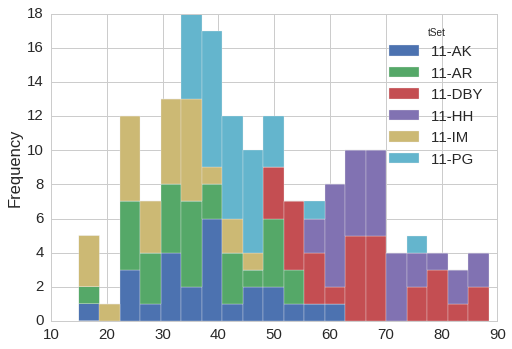

In [13]:
dist3DF = dist2DF.reset_index()
dist3DF
dist3DF.pivot(index='Name', columns='tSet', values='Overall%').plot(kind='hist', stacked=True, bins=20)

# Distribution of marks obtained per question for each paper

### Non-Calculator

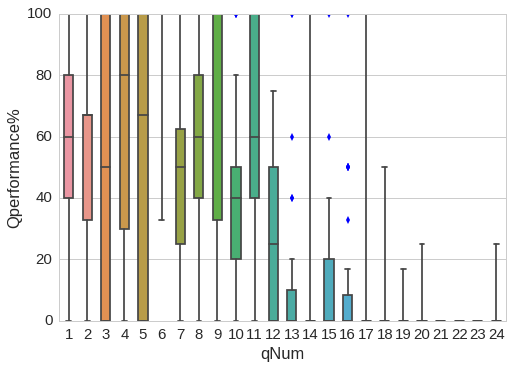

In [14]:
qtotalsDF = class_DF.groupby(by=['aID', 'module', 'qNum']).sum()[['mark', 'total']]
qtotalsDF['%'] = np.round(qtotalsDF['mark'] / qtotalsDF['total'] * 100, 2)
qtotalsDF.reset_index(inplace=True)

sns.boxplot(x='qNum', y='Qperformance%', data=class_DF[class_DF['aID']==56], width=0.5)

### Calculator

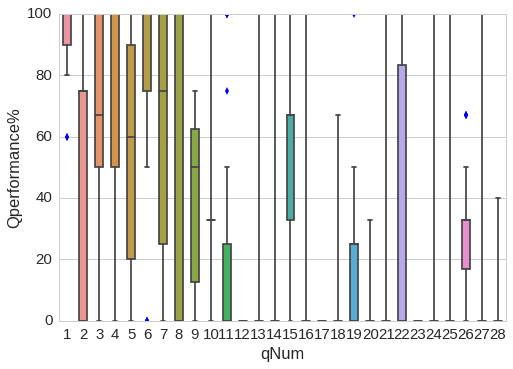

In [15]:
sns.boxplot(x='qNum', y='Qperformance%', data=class_DF[class_DF['aID']==57], width=0.5)

# Total percentage of marks obtained by the class

### Non-Calculator paper

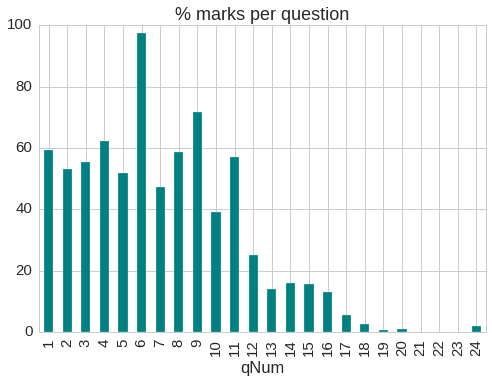

In [16]:
# http://www.computerhope.com/htmcolor.htm for RGB Hex value chart

byQuestionDF = class_DF.groupby(by=['aID', 'qNum']).sum()[['mark', 'total']]
byQuestionDF['%'] = np.round(byQuestionDF['mark'] / byQuestionDF['total'] * 100, 2)
byQuestionDF.reset_index(inplace=True)

noncalc = byQuestionDF[byQuestionDF['aID']==56]
noncalc.set_index('qNum', inplace=True)
noncalc['%'].plot(kind='bar', title='% marks per question', color='#008080')

### Calculator paper

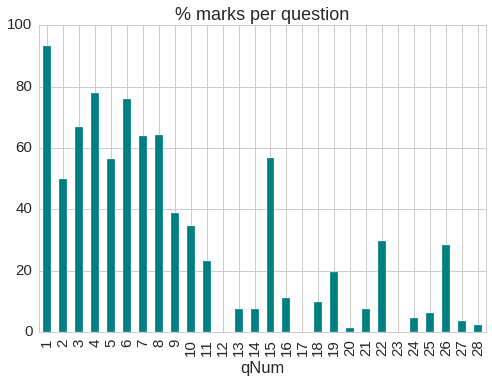

In [17]:
calc = byQuestionDF[byQuestionDF['aID']==57]
calc.set_index('qNum', inplace=True)
calc['%'].plot(kind='bar', x='qNum', y='%', title='% marks per question', color='#008080')

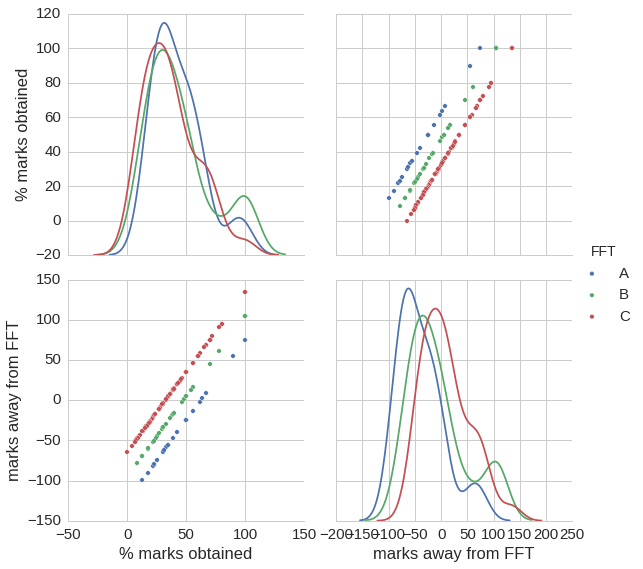

In [53]:
# Well this certainly LOOKS impressive...
by_moduleDF['marks away from FFT'] = np.vectorize(find_dev)(by_moduleDF['FFT'], by_moduleDF['% marks obtained']) * 2
sns.pairplot(by_moduleDF.drop(["mark", "total"], axis=1), hue="FFT", size=4, diag_kind='kde')

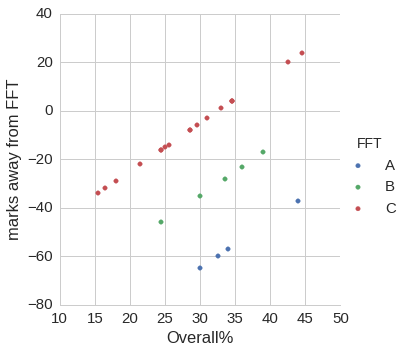

In [24]:
sns.FacetGrid(distDF, hue='FFT', size=5).map(plt.scatter, 'Overall%', 'marks away from FFT').add_legend()